<p style="background-color:#ED7B7B;color:white;text-align:center;font-size:40px;padding:10px 10px;font-weight:bold">Cars Data Analysis EDA<p/>

<p style="background-color:#ED7B7B;color:white;text-align:center;font-size:30px;padding:10px 10px;font-weight:bold">Import Data and Libraries and prepare<p/>

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,accuracy_score
from math import sqrt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('CARS.csv')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [6]:
df.shape

(428, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [13]:
df[df.Cylinders.isna()]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238,18,24,3029,106,174


In [14]:
df.Cylinders.fillna(df.Cylinders.median(),inplace=True)

In [15]:
df[247:249]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,6.0,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,6.0,238,18,24,3029,106,174


In [16]:
df.MSRP = df.MSRP.str.replace('$','').str.replace(',','').astype('float64')
df.Invoice = df.Invoice.str.replace('$','').str.replace(',','').astype('float64')

In [4]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [17]:
df.select_dtypes('O').columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain'], dtype='object')

In [20]:
# Perform One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"
df_dum = pd.get_dummies(df, columns=["Make", "Model", "Type", "Origin", "DriveTrain"])
df_dum.head(3)

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945.0,33337.0,3.5,6.0,265,17,23,4451,106,189,...,False,False,False,False,True,False,False,True,False,False
1,23820.0,21761.0,2.0,4.0,200,24,31,2778,101,172,...,True,False,False,False,True,False,False,False,True,False
2,26990.0,24647.0,2.4,4.0,200,22,29,3230,105,183,...,True,False,False,False,True,False,False,False,True,False


In [21]:
df_dum.shape

(428, 485)

In [23]:
# Invoice feature do not contribute to car price prediction 
df_data = df_dum.drop(["Invoice"], axis = 1)
df_data.shape

(428, 484)

In [24]:
# Feeding input features to X and output (MSRP) to y
X = df_data.drop("MSRP", axis = 1)
y = df_data["MSRP"]

<p style="background-color:#ED7B7B;color:white;text-align:center;font-size:30px;padding:10px 10px;font-weight:bold">Train & Test Data Then Building The Model<p/>

In [25]:
# 90-10 Training and Test Split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((342, 483), (86, 483), (342,), (86,))

##### TRAIN AND EVALUATE A MULTIPLE LINEAR REGRESSION

In [28]:
LinearRegression_model= LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [29]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.6987092516711715

##### TRAIN AND EVALUATE A DECISION TREE MODEL

In [30]:
from sklearn.tree import DecisionTreeRegressor

DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.5969737201004597

##### TRAIN AND EVALUATE A RANDOM FOREST MODEL

In [32]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators= 10, max_depth= 5)
RandomForest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10)

In [33]:
accuracy_RandomForest= RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.7223596777795311

##### TRAIN AN XG-BOOST REGRESSOR MODEL

In [35]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
accuracy_XGBoost = model.score(X_test, y_test)
accuracy_XGBoost

0.8221117544549

#####  COMPARE MODELS AND CALCULATE REGRESSION KPIs

[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

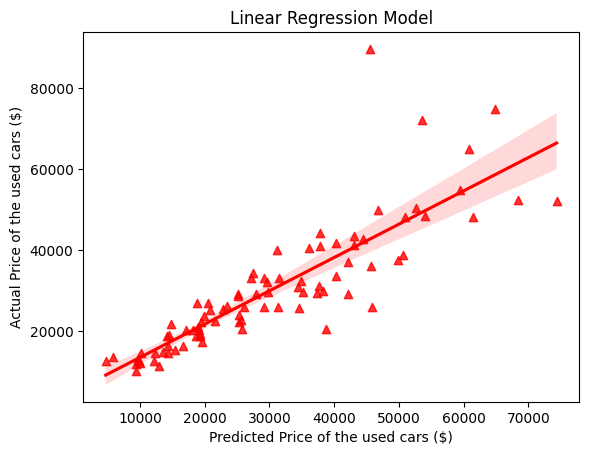

In [41]:
y_predict_linear = LinearRegression_model.predict(X_test)

fig = sns.regplot(x=y_predict_linear,y= y_test, color = 'red', marker = "^")
fig.set(title = "Linear Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [44]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_linear)
MAE= mean_absolute_error(y_test, y_predict_linear)
r2= r2_score(y_test, y_predict_linear)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 8297.073 
MSE = 68841418.89505899 
MAE = 5423.614429621012 
R2 = 0.6987092516711715


[Text(0.5, 1.0, 'Random Forest Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

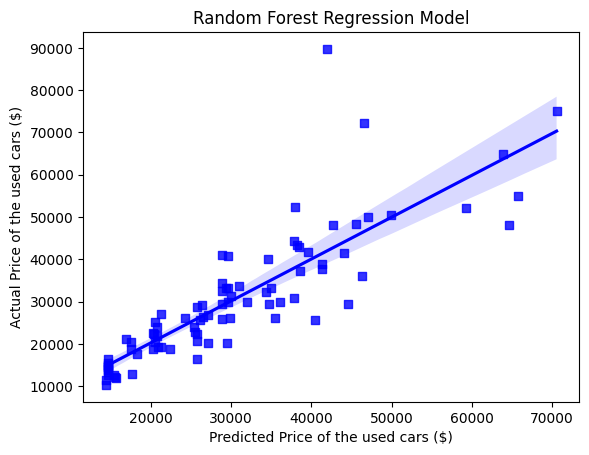

In [46]:
y_predict_RandomForest = RandomForest_model.predict(X_test)

fig = sns.regplot(x=y_predict_RandomForest, y=y_test, color = 'blue', marker = "s")
fig.set(title = "Random Forest Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel= "Actual Price of the used cars ($)")

In [47]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_RandomForest)
MAE= mean_absolute_error(y_test, y_predict_RandomForest)
r2= r2_score(y_test, y_predict_RandomForest)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 7964.771 
MSE = 63437572.61101947 
MAE = 4783.930006046876 
R2 = 0.7223596777795311


[Text(0.5, 1.0, 'XGBoost Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

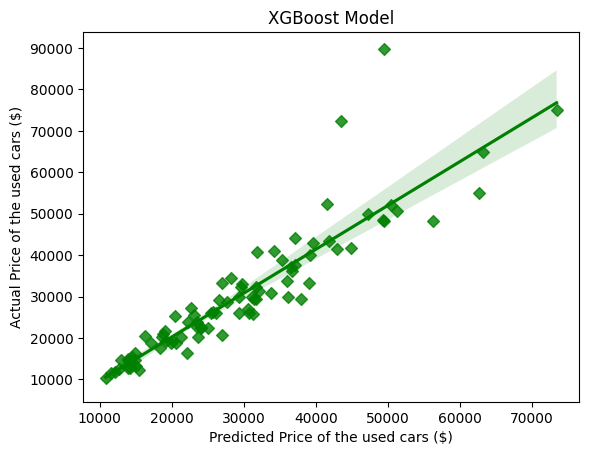

In [48]:
y_predict_XGBoost = model.predict(X_test)

fig = sns.regplot(x=y_predict_XGBoost,y= y_test, color = 'green', marker = "D")
fig.set(title = "XGBoost Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [49]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost)), ".3f"))
MSE = mean_squared_error(y_test, y_predict_XGBoost)
MAE = mean_absolute_error(y_test, y_predict_XGBoost)
r2 = r2_score(y_test, y_predict_XGBoost)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 6375.374 
MSE = 40645387.54011779 
MAE = 3350.4632312863373 
R2 = 0.8221117544549


From the ablove results, it is clearly shown that XGBoost model scores 96% accuracy which outperforms Linear Regression and Random Forest Regression models

<p style="background-color:#ED7B7B;color:white;text-align:center;font-size:40px;padding:10px 10px;font-weight:bold">Thank You<p/>